In [182]:
%matplotlib notebook
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [183]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [184]:
import os
datapath = os.path.join("../processeddata","")  
datapath

'../processeddata\\'

In [185]:
# Load the data
df = pd.read_csv(datapath + "new_airlines_Rank.csv", thousands=',')
df.shape

(4408, 26)

In [186]:
df.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,23974,30060,61606,68335,118831,518,268764,19474,0.194378,False
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,7875,9639,20319,28189,24400,99,77167,4160,0.168378,False
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,6998,8287,13635,26810,17556,278,64480,6201,0.150235,False
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,7021,8670,14763,23379,23804,127,65865,3792,0.180161,False
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,5321,6513,13775,13712,20999,120,52747,4141,0.168893,False


In [187]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Decision Trees 

In [188]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    
    plt.title('Confusion matrix')
    plt.colorbar()
    
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [190]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Rate',
       'Ratio_Rank'],
      dtype='object')

In [191]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Rate',
       'Ratio_Rank']

In [192]:
df_DT = df[col]

In [193]:
df_DT.shape

(4408, 18)

In [194]:
X = df_DT.iloc[:, :-2] # petal df['Rate'],df['Ratio_Rank']
X

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,1009,1275,3217,17,328,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,374,495,685,3,66,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,296,477,389,8,78,29,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,300,472,735,2,54,73,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,283,268,487,4,58,74,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,280,397,171,2,20,97,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,357,513,351,2,50,104,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,560,947,2194,2,119,449,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,338,540,253,3,38,84,1175,14,7426,8699,32066,33682,8057,57,76978,3116


In [195]:
y = df['Ratio_Rank']
y

0       False
1       False
2       False
3       False
4       False
        ...  
4403    False
4404    False
4405     True
4406    False
4407    False
Name: Ratio_Rank, Length: 4408, dtype: bool

### Decision Trees - Gini 

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [197]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [198]:
y_pred = tree_clf.predict(X_test)
y_pred

array([ True,  True, False, ..., False,  True, False])

[[600  91]
 [298 334]]


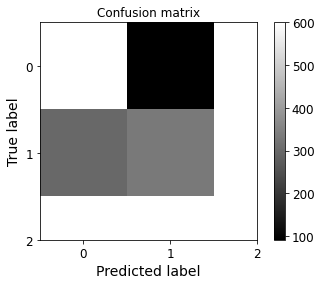

In [199]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

In [200]:
# Print classification report
target_names = ['Class_0', 'Class_1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class_0       0.67      0.87      0.76       691
     Class_1       0.79      0.53      0.63       632

    accuracy                           0.71      1323
   macro avg       0.73      0.70      0.69      1323
weighted avg       0.72      0.71      0.70      1323



In [201]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['Class_0']['precision'])

0.6681514476614699


### Decision Tree - Entropy 

In [202]:
tree_clf_entropy = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
tree_clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [203]:
y_pred_entropy = tree_clf_entropy.predict(X_test)
y_pred_entropy

array([ True, False, False, ..., False,  True,  True])

[[600  91]
 [298 334]]


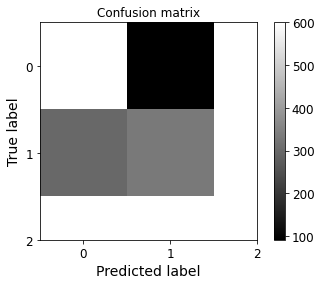

In [204]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

In [205]:
# Print classification report
target_names = ['Class_0', 'Class_1']

result_metrics_entropy = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics_entropy)

              precision    recall  f1-score   support

     Class_0       0.67      0.87      0.76       691
     Class_1       0.79      0.53      0.63       632

    accuracy                           0.71      1323
   macro avg       0.73      0.70      0.69      1323
weighted avg       0.72      0.71      0.70      1323



In [206]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['Class_0']['precision'])

0.6681514476614699


### knn 

In [207]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.metrics import roc_auc_score, auc
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [208]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [209]:
k_value = [1, 5, 15, 20]

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}")
    print("training score: ", knn.score(X_train, y_train))
    print("testing score: ", knn.score(X_test, y_test))
    
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    
    # Print classification report
    target_names = ['class_0', 'class_1']
   
    #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    print(result_metrics)

k=1
training score:  1.0
testing score:  0.8357531760435571
[[472  94]
 [ 87 449]]
              precision    recall  f1-score   support

     class_0       0.84      0.83      0.84       566
     class_1       0.83      0.84      0.83       536

    accuracy                           0.84      1102
   macro avg       0.84      0.84      0.84      1102
weighted avg       0.84      0.84      0.84      1102

k=5
training score:  0.9153055051421658
testing score:  0.8575317604355717
[[486  80]
 [ 77 459]]
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86       566
     class_1       0.85      0.86      0.85       536

    accuracy                           0.86      1102
   macro avg       0.86      0.86      0.86      1102
weighted avg       0.86      0.86      0.86      1102

k=15
training score:  0.8777979431336963
testing score:  0.8566243194192378
[[487  79]
 [ 79 457]]
              precision    recall  f1-score   support

     class_

### Original data - NaiveBayes

In [210]:
nbclf = GaussianNB().fit(X_train, y_train)
nbclf.score(X_test, y_test)

0.6497277676950998

In [211]:
a = cross_val_score(nbclf, X_train, y_train, cv=10, scoring="accuracy")
a.sum()/10

0.6711919802252129

In [212]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[505  61]
 [325 211]]


In [213]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.61      0.89      0.72       566
     Class 1       0.78      0.39      0.52       536

    accuracy                           0.65      1102
   macro avg       0.69      0.64      0.62      1102
weighted avg       0.69      0.65      0.63      1102



### Roc Curv 

Accuracy =  0.7648198934655346


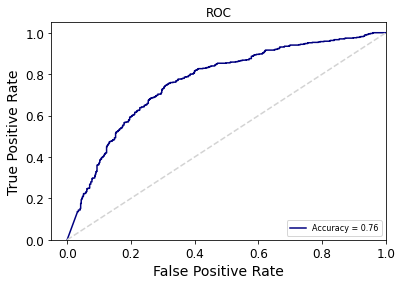

In [214]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### k-Cross Validation

- using KFold function with freedom

In [217]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) 

10

In [218]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

KeyError: "None of [Int64Index([   0,    2,    3,    4,    5,    6,    7,    8,    9,   11,\n            ...\n            4397, 4398, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407],\n           dtype='int64', length=3967)] are in the [columns]"